[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chung\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chung\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('want', 2462), ('life', 2346), ('get', 2329), ('know', 2318), ('time', 1940), ('people', 1906), ('even', 1867), ('depression', 1584), ('thing', 1582), ('really', 1567), ('friend', 1522), ('year', 1518), ('day', 1478), ('one', 1434), ('would', 1316), ('make', 1232), ('think', 1229), ('much', 1212), ('go', 1136), ('never', 1100)]
fu reading old email mother deceased want give got genetic testing done finall
eason depression sad think die alone want crawl non existence hope get diagnos
n keep going mom better dont deserve want get better depressed heartbreak life
se tell parent im depressed suicidal want start digging advice personify depre
inally broken something broke inside want exist unstructured post fact done an
appy impossible situation girlfriend want die long social withdrawal last need
mforting ever way nothing wrong life want alive need something hold onto final
ne reason keep going today label med want keep living way struggling wife unde
alizing wrong one along fucking hurt

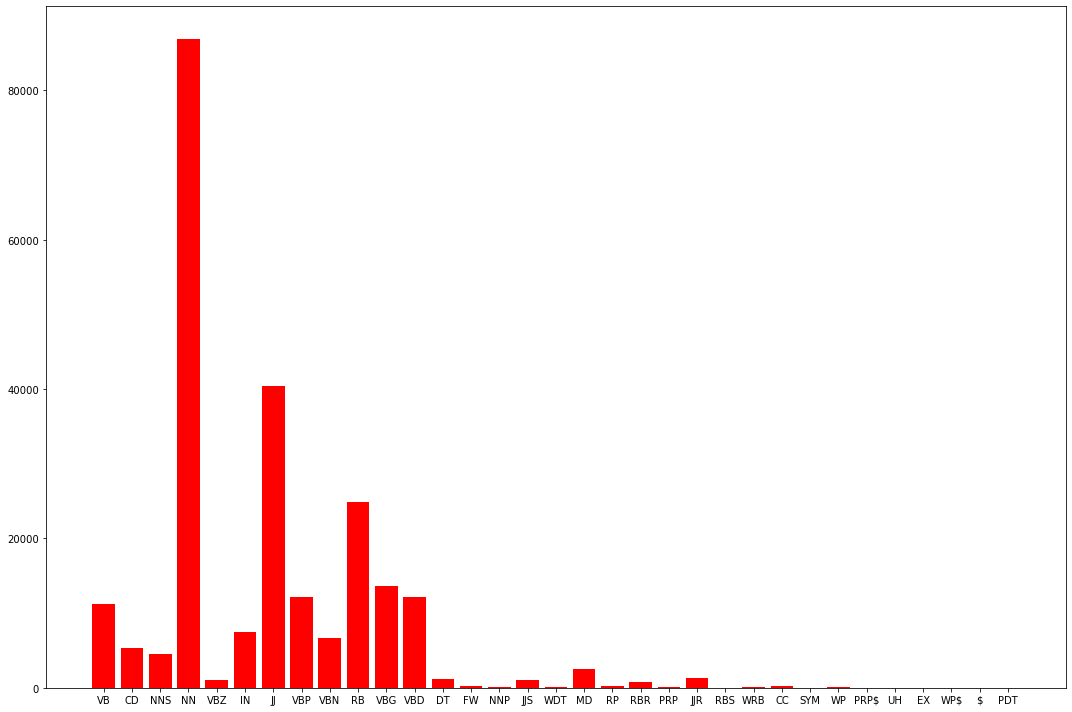

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('averaged_perceptron_tagger')
from nltk import FreqDist


df = pd.read_csv('r-dep data.csv')

###tokenize title and body texts###

tokenizer = RegexpTokenizer(r'\w+')
df['title'] = df['title'].apply(lambda x: tokenizer.tokenize(x.lower()))
#had to add in .astype(str) because it would run into some float types and the .lower() will return an error
df['body'] = df['body'].astype(str).apply(lambda x: tokenizer.tokenize(x.lower()))


###remove stopwords###

#returns all words that aren't in the list of stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words
#had to use 'python -m nltk.downloader stopwords' from the TestEnv to make stopwords work
df['title'] = df['title'].apply(lambda x: remove_stopwords(x))
df['body'] = df['body'].apply(lambda x: remove_stopwords(x))


###lemmatizer -- lemmatizer maps common words back to its base###

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(x) for x in text]
    return lem_text
df['title'] = df['title'].apply(lambda x: word_lemmatizer(x))
df['body'] = df['body'].apply(lambda x: word_lemmatizer(x))


###storing title and body columns as a list to feed into pos_tag###
title_list = list(df['title'])
body_list = list(df['body'])


#Text classification: pos tagging
pos_tagged_title = []
pos_tagged_body = []
for ele in title_list:
    pos_tagged_title.append(nltk.pos_tag(ele))
for ele in body_list:
    pos_tagged_body.append(nltk.pos_tag(ele))
    
df['pos_tagged_title'] = pos_tagged_title
df['pos_tagged_body'] = pos_tagged_body



###The codes below analyzes text frequency distribution, collocation, and concordance while excluding certain words###
single_w = []
exclude_list = ['anyone','else','feel','like','fuck']
for item in df['pos_tagged_title']:
    for tuples in item:
        if tuples[0] not in exclude_list:
            single_w.append(tuples[0])
            
for item in df['pos_tagged_body']:
    for tuples in item:
        if tuples[0] not in exclude_list:
            single_w.append(tuples[0])
            
fd = nltk.FreqDist(single_w)
print(fd.most_common(20))


text = nltk.Text(single_w)
concordance_list = text.concordance_list("want", lines=20)
for entry in concordance_list:
    print(entry.line)
finder = nltk.collocations.QuadgramCollocationFinder.from_words(text)
print(finder)
print(finder.ngram_fd.most_common(20))


'''creating a dictionary to store counts of unique POS tags'''
pos_list = []
for row in df['pos_tagged_body']:
    for tup in row:
        if tup[1] not in pos_list:
            pos_list.append(tup[1])
            
for row in df['pos_tagged_title']:
    for tup in row:
        if tup[1] not in pos_list:
            pos_list.append(tup[1])
            
pos_dict = {}
for item in pos_list:
    pos_dict[item] = 0
    for row in df['pos_tagged_body']:
        for tup in row:
            if tup[1] == item:
                pos_dict[item] += 1
    
    for row in df['pos_tagged_title']:
        for tup in row:
            if tup[1] == item:
                pos_dict[item] += 1
                

'''Plotting the counts'''
%matplotlib inline

fig = plt.figure(figsize=(15,10))
plt.bar(pos_dict.keys(), pos_dict.values(), color='red')
plt.tight_layout()
plt.savefig("pos_dist.png", dpi=300)
plt.show()


###getting headers###
key_list = []
for key in df.keys():
    key_list.append(key)

df.to_csv('r-dep data cleaned.csv', index=False, header=key_list)
